In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv(r"C:\Users\HONG YANGXUAN\Desktop\5高级商业分析\期中\terminal\PurchasesFINAL12312016-1.csv")

In [5]:
df['PODate'] = pd.to_datetime(df['PODate'])
df['ReceivingDate'] = pd.to_datetime(df['ReceivingDate'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['PayDate'] = pd.to_datetime(df['PayDate'])

In [6]:
df['LeadTime'] = (df['ReceivingDate'] - df['PODate']).dt.days
df['PaymentLT'] = (df['PayDate'] - df['InvoiceDate']).dt.days

In [7]:
top_vendors = df['VendorName'].value_counts().head(10).index
df_top = df[df['VendorName'].isin(top_vendors)].copy()

In [9]:
df_top.head

<bound method NDFrame.head of                     InventoryId  Store  Brand                 Description  \
5                 5_SUTTON_3348      5   3348         Bombay Sapphire Gin   
6           1_HARDERSFIELD_8358      1   8358           Bacardi 151 Proof   
7              30_CULCHETH_4903     30   4903        Bacardi Superior Rum   
8             34_PITMERDEN_3782     34   3782  Grey Goose Le Citron Vodka   
9           1_HARDERSFIELD_4233      1   4233   Castillo Silver Label Rum   
...                         ...    ...    ...                         ...   
2372432     62_KILMARNOCK_24875     62  24875       Glen Ellen Merlot RSV   
2372433     62_KILMARNOCK_24875     62  24875       Glen Ellen Merlot RSV   
2372434  56_BEGGAR'S HOLE_24875     56  24875       Glen Ellen Merlot RSV   
2372435     62_KILMARNOCK_24953     62  24953              Chloe Prosecco   
2372436        51_ABERDEEN_6349     51   6349        Glen Ellen Chard RSV   

          Size  VendorNumber                 

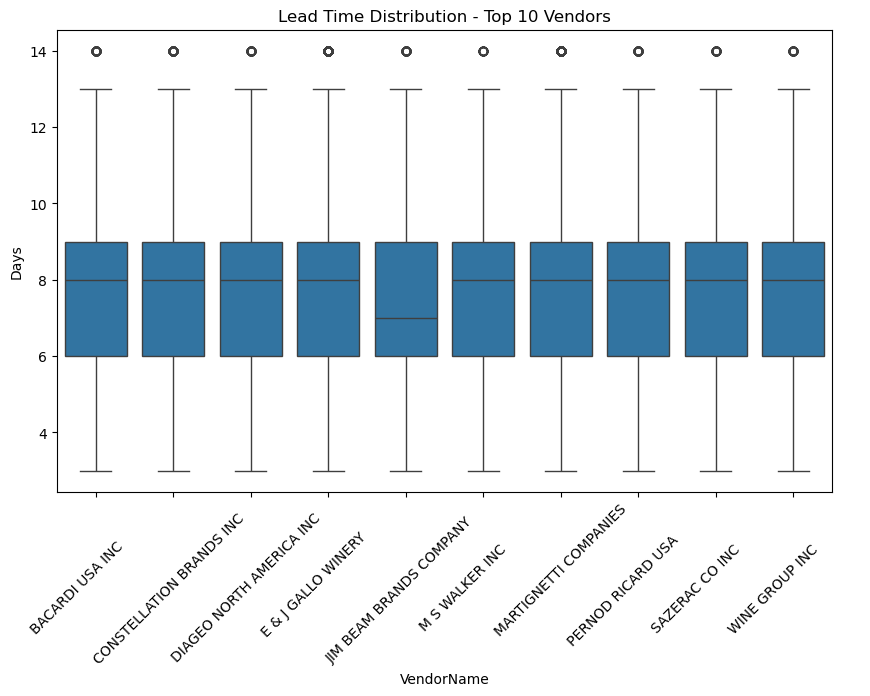

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='VendorName', y='LeadTime', data=df_top)
plt.xticks(rotation=45)
plt.title('Lead Time Distribution - Top 10 Vendors')
plt.ylabel('Days')
plt.show()


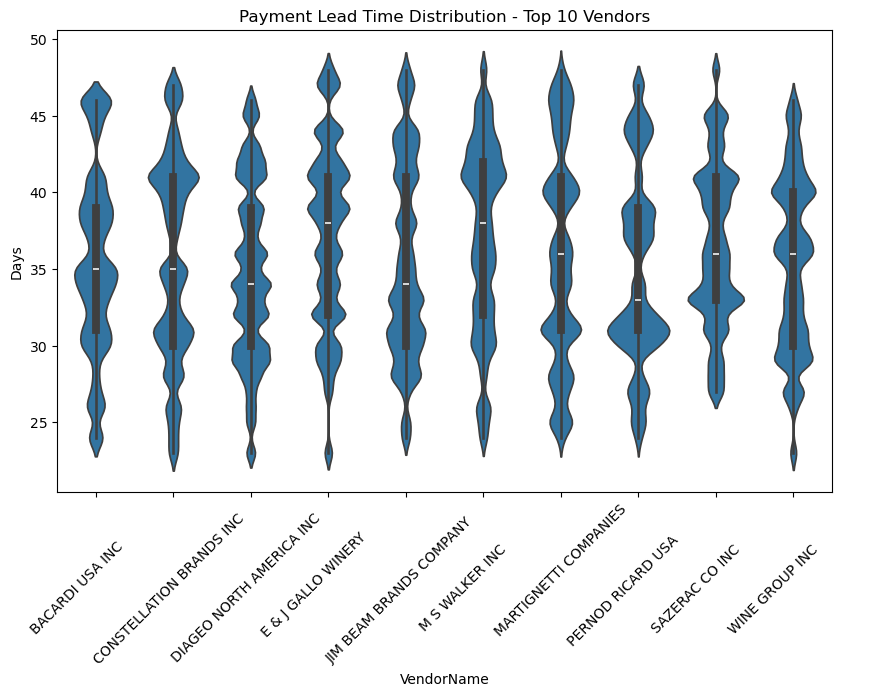

In [11]:
plt.figure(figsize=(10,6))
sns.violinplot(x='VendorName', y='PaymentLT', data=df_top)
plt.xticks(rotation=45)
plt.title('Payment Lead Time Distribution - Top 10 Vendors')
plt.ylabel('Days')
plt.show()

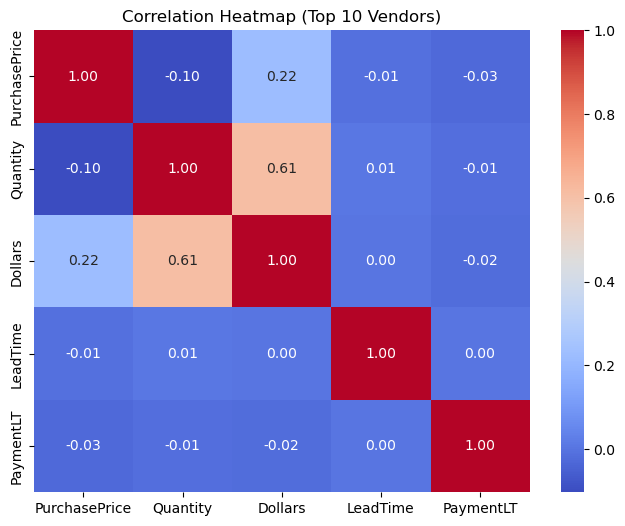

In [12]:
corr = df_top[['PurchasePrice','Quantity','Dollars','LeadTime','PaymentLT']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Top 10 Vendors)')
plt.show()

C:\Users\HONG YANGXUAN\AppData\Local\Temp\ipykernel_11900\1315945037.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_top['Dollars'].resample('M').sum()


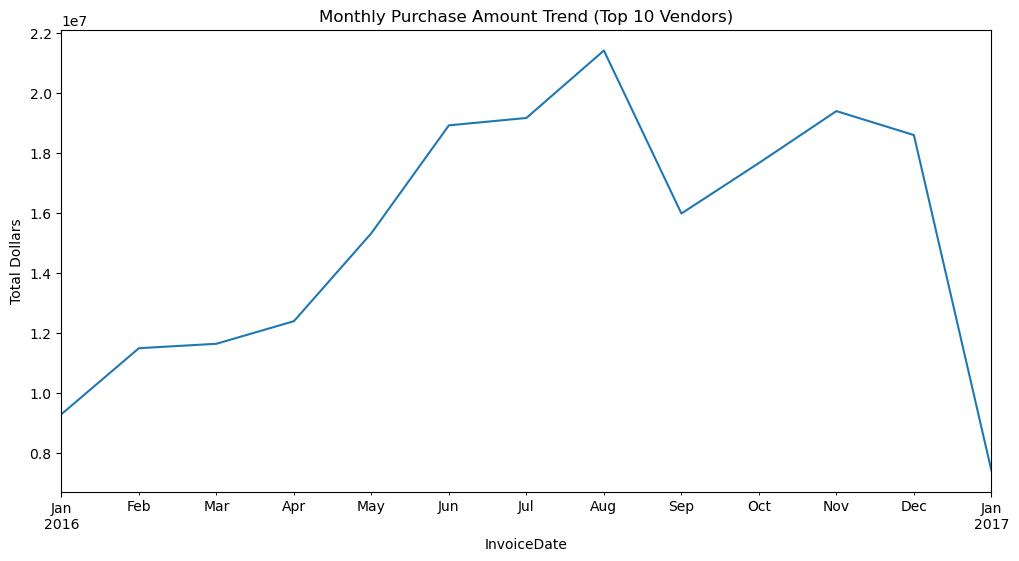

In [13]:
df_top.set_index('InvoiceDate', inplace=True)
monthly_sales = df_top['Dollars'].resample('M').sum()
plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title('Monthly Purchase Amount Trend (Top 10 Vendors)')
plt.ylabel('Total Dollars')
plt.show()